In [1]:
import numpy as np
import pandas as pd
from data_anonymizer import DataAnonymizer

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
# Adding Fake NRIC Column
fakenric = pd.Series(range(1000000, 1048843)).map(lambda x : "T" + str(x) + "Z")
df["NRIC"] = fakenric

# Adding Fake Date of Birth Column

import random
from datetime import datetime, timedelta

def generate_random_dates_of_birth(k):
    today = datetime.now().date()
    dates_of_birth = []
    
    for _ in range(k):
        random_days = random.randint(0, 365*100)  # Random number of days within 100 years
        random_dob = today - timedelta(days=random_days)
        dates_of_birth.append(random_dob)
    
    return dates_of_birth

df['DOB'] =  generate_random_dates_of_birth(df.shape[0])

In [4]:
anonymizer = DataAnonymizer(df)

Auto Detecting all Data Properties...
Running Column Type Checker...
Running Information Type Checker...
Running Sensitivity Type Checker...
Constructing Properties Frame
Auto-Generated Properties Frame. To change a property, use the change_property method.


In [5]:
anonymizer.properties_frame

,Column Type,Information Type,Sensitivity Type
Column Name,,,
age,Continuous,Others,Indirect Identifier
workclass,Categorical,Others,Non-Sensitive
fnlwgt,Continuous,Others,Non-Sensitive
education,Categorical,Others,Non-Sensitive
educational-num,Categorical,Others,Non-Sensitive
marital-status,Categorical,Others,Non-Sensitive
occupation,Categorical,Others,Non-Sensitive
relationship,Categorical,Others,Non-Sensitive
race,Categorical,Others,Indirect Identifier


In [6]:
anonymizer.get_mask_table()

,Transformer
Column Name,
age,Generalise (Numerical Bin Mean)
workclass,Retain
fnlwgt,Retain
education,Retain
educational-num,Retain
marital-status,Retain
occupation,Retain
relationship,Retain
race,Encode


In [7]:
anonymizer.change_property('age', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('gender', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('native-country', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('workclass', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('education', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('educational-num', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('capital-gain', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('capital-loss', 
                        'sensitivity_type',
                        'Indirect Identifier')

anonymizer.change_property('NRIC', 
                        'information_type',
                        'NRIC')

,Column Type,Information Type,Sensitivity Type
Column Name,,,
age,Continuous,Others,Indirect Identifier
workclass,Categorical,Others,Indirect Identifier
fnlwgt,Continuous,Others,Non-Sensitive
education,Categorical,Others,Indirect Identifier
educational-num,Categorical,Others,Indirect Identifier
marital-status,Categorical,Others,Non-Sensitive
occupation,Categorical,Others,Non-Sensitive
relationship,Categorical,Others,Non-Sensitive
race,Categorical,Others,Indirect Identifier


In [8]:
anonymizer.get_mask_table() # autosuggest type of masking for each column (in order of priority) 
# a dictionary returned key = col_name,     val = recommended masking function

,Transformer
Column Name,
age,Generalise (Numerical Bin Mean)
workclass,Encode
fnlwgt,Retain
education,Encode
educational-num,Encode
marital-status,Retain
occupation,Retain
relationship,Retain
race,Encode


In [9]:
anonymizer.list_allowed_transformations('income')

['Encode',
 'Retain',
 'Surpress',
 'Pseudonymise',
 'Full Masking',
 'Transpose',
 'Shuffle']

In [10]:
anonymizer.change_masking(colname = 'age', masking_name = "Generalise (Numerical Bin Mean)") #masking algo
anonymizer.change_masking(colname = 'marital-status', masking_name = "Surpress")
anonymizer.change_masking(colname = 'fnlwgt', masking_name = "Pseudonymise")
anonymizer.change_masking(colname = 'race', masking_name = "Shuffle")
anonymizer.change_masking(colname = 'hours-per-week', masking_name = "Generalise (Numerical Bin Mean)")
anonymizer.change_masking(colname = 'NRIC', masking_name = "Full Masking")

,Transformer
Column Name,
age,Generalise (Numerical Bin Mean)
workclass,Encode
fnlwgt,Pseudonymise
education,Encode
educational-num,Encode
marital-status,Surpress
occupation,Retain
relationship,Retain
race,Shuffle


In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,NRIC,DOB
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,T1000000Z,1985-05-24
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,T1000001Z,1989-07-06
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,T1000002Z,2021-10-04
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,T1000003Z,2017-08-05
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,T1000004Z,1941-06-15


In [12]:
anonymizer.apply_masking()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,NRIC,DOB
0,28.0,4,dc6104e6b688df78ba4abf3060d43758005e516e0fef2e...,1,6,-,Machine-op-inspct,Own-child,White,1,4950.0,216.0,35.0,United-States,0,---------,1988-07-12 00:00:00
1,36.0,4,a4bce49b545d6ea7b117a3897c12d372ce9d3c7b64f34f...,11,8,-,Farming-fishing,Husband,White,1,4950.0,216.0,45.0,United-States,0,---------,1988-07-12 00:00:00
2,28.0,2,8bf17dc8d786c16888079e8d241e17154a61ed087b4002...,7,11,-,Protective-serv,Husband,White,1,4950.0,216.0,35.0,United-States,1,---------,2018-07-05 00:00:00
3,42.0,4,1a561f87377d353e18f915aaddf0fcfcc742b61f035355...,15,9,-,Machine-op-inspct,Husband,Black,1,4950.0,216.0,35.0,United-States,1,---------,2018-07-05 00:00:00
4,20.0,0,45abd026339c172e3feafc94980cf76b4052b03ad4af69...,15,9,-,?,Own-child,White,0,4950.0,216.0,26.0,United-States,0,---------,1938-07-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,28.0,4,6cbd92497439d33e07977a21a6c4fec6e8ccf8773a7bd7...,7,11,-,Tech-support,Wife,White,0,4950.0,216.0,35.0,United-States,0,---------,1928-07-08 12:00:00
48838,42.0,4,50df42d528789d626a7f92f2da026bcf291134abd0348f...,11,8,-,Machine-op-inspct,Husband,Black,1,4950.0,216.0,35.0,United-States,1,---------,2018-07-05 00:00:00
48839,58.0,4,3439c79cef1cd8b692a298022db015dc5ae4334616259c...,11,8,-,Adm-clerical,Unmarried,White,0,4950.0,216.0,35.0,United-States,0,---------,1928-07-08 12:00:00
48840,20.0,4,a5ca8ce11e945b3866bf9a6dc8a8a19d050b65a8d7b779...,11,8,-,Adm-clerical,Own-child,White,1,4950.0,216.0,16.0,United-States,0,---------,1928-07-08 12:00:00


In [13]:
dupli = anonymizer.get_quasi_masked_table()
dupli

,age,workclass,education,educational-num,race,gender,capital-gain,capital-loss,native-country,DOB
0,28.0,4,1,6,White,1,4950.0,216.0,United-States,1988-07-12 00:00:00
1,36.0,4,11,8,White,1,4950.0,216.0,United-States,1988-07-12 00:00:00
2,28.0,2,7,11,White,1,4950.0,216.0,United-States,2018-07-05 00:00:00
3,42.0,4,15,9,Black,1,4950.0,216.0,United-States,2018-07-05 00:00:00
4,20.0,0,15,9,White,0,4950.0,216.0,United-States,1938-07-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...
48837,28.0,4,7,11,White,0,4950.0,216.0,United-States,1928-07-08 12:00:00
48838,42.0,4,11,8,Black,1,4950.0,216.0,United-States,2018-07-05 00:00:00
48839,58.0,4,11,8,White,0,4950.0,216.0,United-States,1928-07-08 12:00:00
48840,20.0,4,11,8,White,1,4950.0,216.0,United-States,1928-07-08 12:00:00


In [14]:
re_id_table = anonymizer.get_re_identification_table()

c:\Users\User\Desktop\SynPiper\anonymizer\data_anonymizer.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicate_rows.loc[:, "count"] = 1


In [15]:
anonymizer.avg_re_identification_prob()

31.919129381762886

In [16]:
anonymizer.unique_row_proportion()

'22.746816264690224%'

In [17]:
anonymizer.percentage_rows_below_k_threshold(360)

100.0

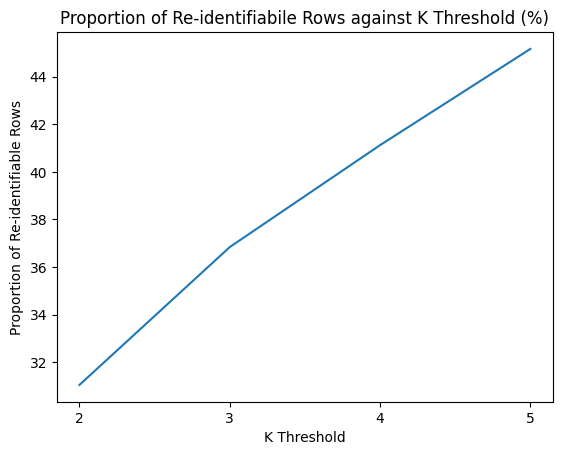

In [18]:
anonymizer.generate_k_threshold_plot()